# TSIA202a - First Practice Session

The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version.

Let consider the following real processes:

-   White Noise (denoted $\text{WN}$): $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-   $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
-   $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough" $K \to \infty$ ?)
-   Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda_0 \in [0,\pi],$ $\Phi_0 \sim {U}([0,2\pi])$ (_e.g._ `np.random.uniform`)

For each of them:

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.

2. Compute the empirical mean and empirical autocovariance function using course's formulas in `python`.

3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:

-   For a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
-   Repeat the previous step $100$ times and saves all the results.
-   Compute the boxplot of the MSE for each $T$ and comment.


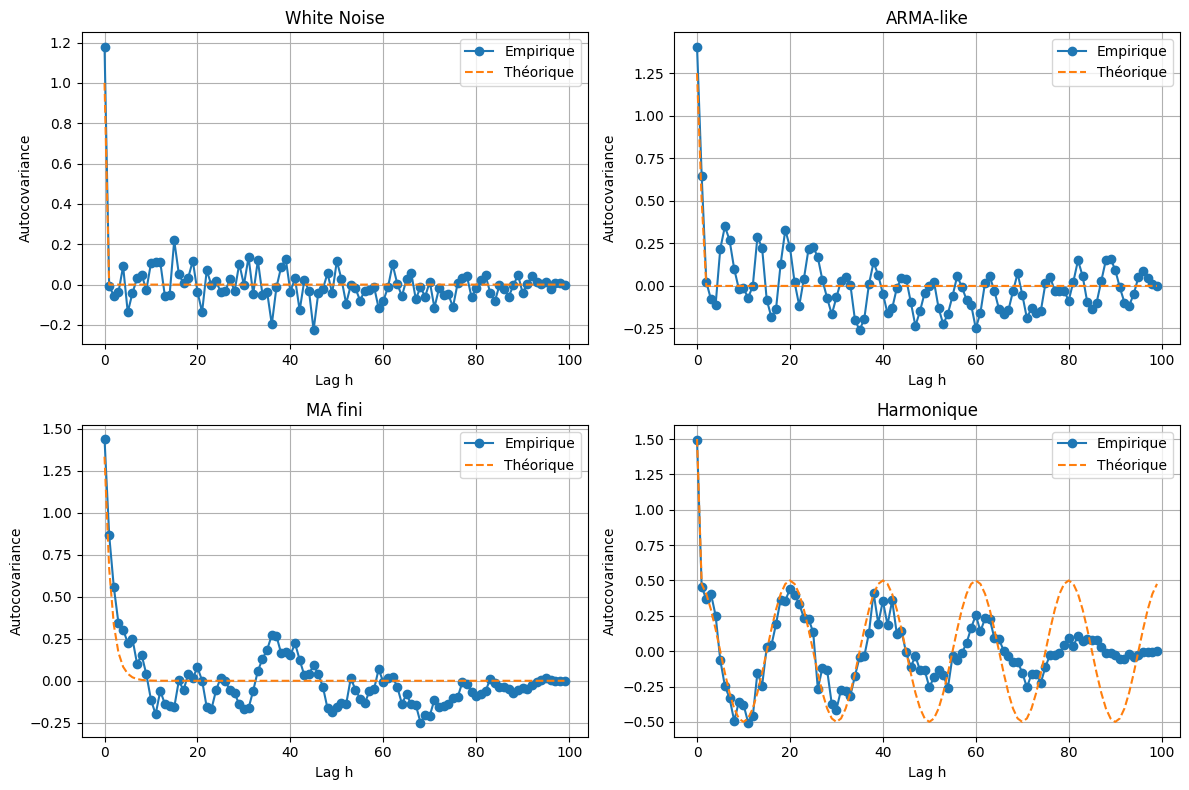

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Paramètres
# ---------------------------
T = 100
sigma = 1.0
a = 0.0
b = 0.5
K = 50
A0 = 1.0
lambda0 = np.pi / 10


# ---------------------------
# Utilities
# ---------------------------
def empirical_mean(X):
    """Return sample mean."""
    return np.mean(X)


def empirical_autocov(X, h_max=None):
    """
    Empirical autocovariance for lags 0..h_max.
    ALSO: center with empirical_mean(X).
    """
    T = len(X)
    mu = empirical_mean(X)
    X_centered = X - mu
    if h_max is None:
        h_max = T - 1
    gamma = np.zeros(h_max + 1)
    for h in range(h_max + 1):
        gamma[h] = np.dot(X_centered[:T-h], X_centered[h:])/T

    return gamma


# ---------------------------
# 1. White Noise
# ---------------------------
Z = np.random.normal(0, sigma, T)
X_WN = Z

# empirical
gamma_WN_emp = empirical_autocov(X_WN)

# theoretical
gamma_WN_theo = np.zeros(T)
gamma_WN_theo[0] = sigma**2

# ---------------------------
# 2. ARMA-like : X_t = a + b Z_t + Z_{t-1}
# ---------------------------
Z = np.random.normal(0, sigma, T)
Z_shifted = np.roll(Z, 1)
Z_shifted[0] = 0
X_ARMA = a + b*Z + Z_shifted

gamma_ARMA_emp = empirical_autocov(X_ARMA)

gamma_ARMA_theo = np.zeros(T)
gamma_ARMA_theo[0] = (1 + b**2) * sigma
gamma_ARMA_theo[1] = b * (sigma**2)

# ---------------------------
# 3. MA fini
# ---------------------------
Z = np.random.normal(0, sigma, T + K)
coeffs = np.array([2 ** (-k) for k in range(K + 1)])
X_MA = np.zeros(T)

for t in range(T):
    X_MA[t] = np.dot(coeffs[:K+1], Z[t:t+K+1][::-1])+a

gamma_MA_emp = empirical_autocov(X_MA)

gamma_MA_theo = np.zeros(T)

h_max_theo = min(K, T - 1)

for h in range(h_max_theo + 1):
    c1 = coeffs[0: K-h+1]
    c2 = coeffs[h: K+1]
    gamma_MA_theo[h] = sigma**2 * np.dot(c1, c2)

# ---------------------------
# 4. Harmonic process
# ---------------------------
Phi0 = np.random.uniform(0, 2 * np.pi)

Z = np.random.normal(0, sigma, T)
t = np.arange(T)
X_Harm = A0 * np.cos(lambda0 * t + Phi0) + Z

gamma_Harm_emp = empirical_autocov(X_Harm)

gamma_Harm_theo = np.zeros(T)
gamma_Harm_theo[0] = (A0**2 / 2) + sigma**2

gamma_Harm_theo[1:] = (A0**2 / 2) * np.cos(lambda0 * np.arange(1, T))

# ---------------------------
# Tracé des autocovariances
# ---------------------------
processes = ["White Noise", "ARMA-like", "MA fini", "Harmonique"]
empirical = [gamma_WN_emp, gamma_ARMA_emp, gamma_MA_emp, gamma_Harm_emp]
theoretical = [gamma_WN_theo, gamma_ARMA_theo, gamma_MA_theo, gamma_Harm_theo]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(empirical[i], label="Empirique", marker="o")
    plt.plot(theoretical[i], label="Théorique", linestyle="--")
    plt.title(processes[i])
    plt.xlabel("Lag h")
    plt.ylabel("Autocovariance")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

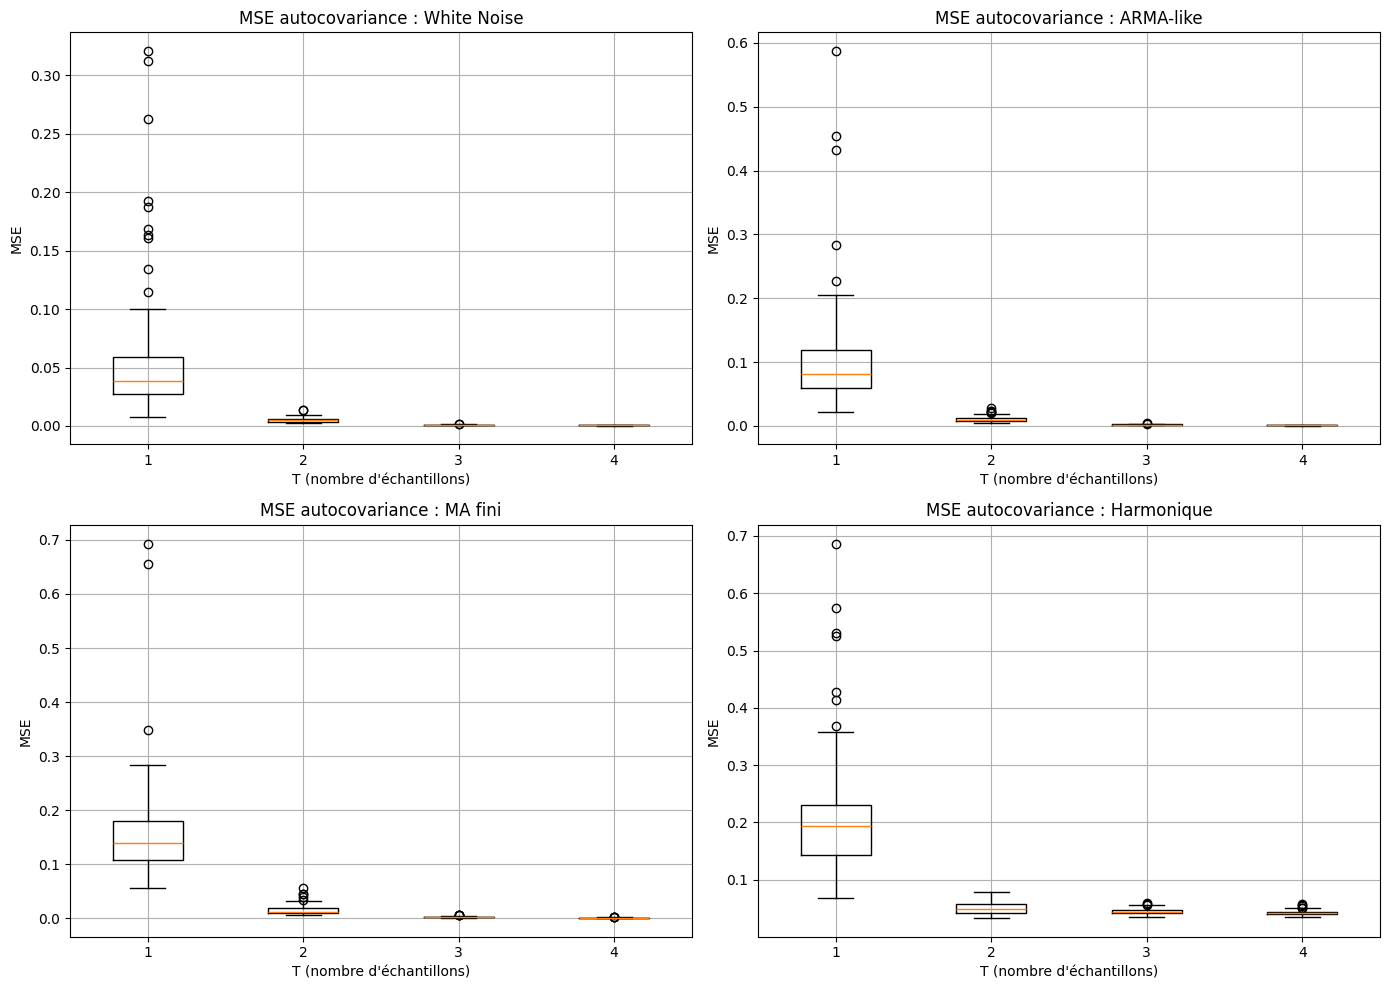

In [ ]:
# ---------------------------
# Q4. MSE et Boxplot
# ---------------------------
sigma = 1.0
a = 0.0
b = 0.5
K = 50
A0 = 1.0
lambda0 = np.pi / 10
T_list = [10, 100, 500, 1000]
n_simulations = 100


def mse_gamma(gamma_theo, gamma_emp):
    """
    Mean Squared Error between theoretical and empirical autocovariances
    Return: float (scalar MSE)
    """
    L = len(gamma_emp)

    gamma_theo = gamma_theo[:L]

    return np.mean((gamma_theo-gamma_emp)**2)


# implement simulation functions


def simulate_WN(T):
    return np.random.normal(0, sigma, T)


def theo_WN(T):
    gamma_theo = np.zeros(T)
    gamma_theo[0] = sigma**2
    return gamma_theo


def simulate_ARMA(T):
    Z = np.random.normal(0, sigma, T)
    Z_shifted = np.roll(Z, 1)
    Z_shifted[0] = 0
    return a + b * Z + Z_shifted


def theo_ARMA(T):
    gamma_theo = np.zeros(T)
    if T > 0:
        gamma_theo[0] = sigma**2 * (1 + b**2)
    if T > 1:
        gamma_theo[1] = sigma**2 * b
    return gamma_theo


def simulate_MA(T):
    Z = np.random.normal(0, sigma, T + K)
    X_MA = np.zeros(T)
    coeffs = np.array([2 ** (-k) for k in range(K + 1)])
    for t in range(T):
        Z_slice_for_t = Z[t:t+K+1][::-1]
        X_MA[t] = a + np.dot(coeffs, Z_slice_for_t)
    return X_MA


def theo_MA(T):
    coeffs = np.array([2 ** (-k) for k in range(K + 1)])
    gamma_theo = np.zeros(T)
    h_max_theo = min(K, T - 1)
    for h in range(h_max_theo + 1):
        c1 = coeffs[0: K-h+1]
        c2 = coeffs[h: K+1]
        gamma_theo[h] = sigma**2 * np.dot(c1, c2)
    return gamma_theo


def simulate_Harm(T):
    Phi0 = np.random.uniform(0, 2 * np.pi)
    Z = np.random.normal(0, sigma, T)
    t = np.arange(T)
    return A0 * np.cos(lambda0 * t + Phi0) + Z


def theo_Harm(T):
    gamma_theo = np.zeros(T)
    if T > 0:
        gamma_theo[0] = (A0**2 / 2) + sigma**2
    if T > 1:
        h_vec = np.arange(1, T)
        gamma_theo[1:] = (A0**2 / 2) * np.cos(lambda0 * h_vec)
    return gamma_theo


MSE_results = {
    'White Noise': {T_val: [] for T_val in T_list},
    'ARMA-like': {T_val: [] for T_val in T_list},
    'MA fini': {T_val: [] for T_val in T_list},
    'Harmonique': {T_val: [] for T_val in T_list},
}
sim_funcs = {
    'White Noise': simulate_WN,
    'ARMA-like': simulate_ARMA,
    'MA fini': simulate_MA,
    'Harmonique': simulate_Harm,
}
theo_funcs = {
    'White Noise': theo_WN,
    'ARMA-like': theo_ARMA,
    'MA fini': theo_MA,
    'Harmonique': theo_Harm,
}

processes = ["White Noise", "ARMA-like", "MA fini", "Harmonique"]

for proc_name in processes:
    for T in T_list:
        sim_func = sim_funcs[proc_name]
        theo_func = theo_funcs[proc_name]

        gamma_theo = theo_func(T)

        for i in range(n_simulations):
            X = sim_func(T)

            gamma_emp = empirical_autocov(X)

            mse = mse_gamma(gamma_theo, gamma_emp)

            MSE_results[proc_name][T].append(mse)


T_list = [10, 100, 500, 1000]

plt.figure(figsize=(14, 10))
for i, proc_name in enumerate(processes):
    plt.subplot(2, 2, i+1)
    data = [MSE_results[proc_name][T] for T in T_list]

    plt.boxplot(data, label=[str(t) for t in T_list])
    plt.title(f"MSE autocovariance : {proc_name}")
    plt.xlabel("T (nombre d'échantillons)")
    plt.ylabel("MSE")
    plt.grid(True)

plt.tight_layout()